In [2]:
# Import packages

%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Import  datasets

# Change path for different computer

rookieRB2018_path = r'C:\Users\Jeremy\Desktop\RookieRB2018.csv'
rookieRBPrev_path = r'C:\Users\Jeremy\Desktop\RookieRB08-17.csv'
projRB_path = r'C:\Users\Jeremy\Desktop\RB_Projected.csv'
trainingRB_path = r'C:\Users\Jeremy\Desktop\RB_Aggregate.csv'
RB2018_path = r'C:\Users\Jeremy\Desktop\RB2018.csv'
dfRookieRB2018 = pd.read_csv(rookieRB2018_path)
dfRookieRBPrev = pd.read_csv(rookieRBPrev_path)
dfRookieRBPrevGraph = pd.read_csv(rookieRBPrev_path)
dfProjectedRB = pd.read_csv(projRB_path)
dfTrainingRB = pd.read_csv(trainingRB_path)
dfRB2018 = pd.read_csv(RB2018_path)
dfRookieRBPrev.columns

Index(['Name', 'GP-Col', 'ATT-Col', 'RuYDS-Col', 'Y/A-Col', 'RuTD-Col',
       'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col', 'Height', 'Weight',
       '40 Time', 'Vertical', 'Bench Press', 'Broad Jump', 'GP', 'ATT',
       'RuYDS', 'Y/A', 'RuTD', 'REC', 'RecYDS', 'Y/R', 'RecTD', 'FantPt'],
      dtype='object')

In [4]:
dfRookieRB2018.head()

,Name,GP,ATT,RuYDS,Y/A,RuTD,REC,RecYDS,Y/R,RecTD,Height,Weight,40 Time,Vertical,Bench Press,Broad Jump,Projected GP
0,Saquon Barkley,38,671,3843,5.7,43,102,1195,11.7,8,71,233,4.41,41.0,29.0,NaN,16
1,Rashaad Penny,51,488,3656,7.5,38,42,479,11.4,6,71,220,4.46,32.5,13.0,120.0,16
2,Sony Michel,47,590,3613,6.1,33,64,621,9.7,6,71,215,4.54,NaN,22.0,NaN,13
3,Nick Chubb,47,758,4769,6.3,44,31,361,11.6,4,71,227,4.53,38.5,29.0,120.0,13
4,Ronald Jones II,40,591,3619,6.1,39,32,302,9.4,3,71,208,4.65,36.5,NaN,NaN,16


In [5]:
dfRookieRBPrev.columns

Index(['Name', 'GP-Col', 'ATT-Col', 'RuYDS-Col', 'Y/A-Col', 'RuTD-Col',
       'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col', 'Height', 'Weight',
       '40 Time', 'Vertical', 'Bench Press', 'Broad Jump', 'GP', 'ATT',
       'RuYDS', 'Y/A', 'RuTD', 'REC', 'RecYDS', 'Y/R', 'RecTD', 'FantPt'],
      dtype='object')

In [6]:
dfTrainingRB.head()

,Name,G,Att,Yds,Y/A,TD,Tgt,Rec,RecYds,Y/R,RecTD,Fmb,OPPG,SOS,OL RNK,FantPt
0,DeMarco Murray,16,392,1845,4.71,13,64,57,416,7.30,0,6,29.2,-0.3,1,294
1,Le'Veon Bell,16,290,1361,4.69,8,105,83,854,10.29,3,0,27.2,-1.0,6,288
2,Marshawn Lynch,16,280,1306,4.66,13,48,37,367,9.92,4,4,24.6,1.6,4,265
3,Matt Forte,16,266,1038,3.90,6,130,102,808,7.92,4,2,19.9,0.5,15,245
4,Arian Foster,13,260,1246,4.79,8,59,38,327,8.61,5,2,23.2,-1.8,23,236


In [7]:
# Deal with empty spaces 

dfRookieRB2018 = dfRookieRB2018.fillna(0)
dfRookieRBPrev = dfRookieRBPrev.fillna(0)
dfTrainingRB = dfTrainingRB.fillna(0)
dfRB2018 = dfRB2018.fillna(0)
dfRookieRBPrevGraph = dfRookieRBPrevGraph.dropna()
dfRB2018.head()

,Name,Expected G,Avg Att,Avg Yds,Avg Y/A,Avg TD,Avg Tgt,Avg Rec,Avg RecYds,Avg Y/R,Avg RecTD,Avg Fmb,OPPG,SOS,OL RNK
0,Todd Gurley,16,291,1277,4.4,13,68,51,517,10.1,3,3,34.9,1.0,1
1,Le'Veon Bell,6,317,1377,4.3,9,103,81,687,8.5,2,2,28.8,0.8,13
2,David Johnson,16,225,923,4.1,11,86,57,606,10.6,3,5,14.6,-0.2,22
3,Ezekiel Elliott,16,348,1628,4.7,12,63,48,456,9.5,3,4,20.6,0.5,9
4,Alvin Kamara,16,201,1050,5.2,14,131,104,986,9.5,6,1,34.9,0.8,2


In [8]:
# Train and test set construction for RB veterans

train, test = train_test_split(dfTrainingRB, test_size=0.2, random_state=40)
 
xtrain = train[['G', 'Att', 'Yds', 'Y/A', 'TD', 'Tgt', 'Rec',
       'RecYds', 'Y/R', 'RecTD',  'Fmb', 'OPPG', 'SOS', 'OL RNK']]
ytrain = train[['FantPt']]
 
xtest = test[['G', 'Att', 'Yds', 'Y/A', 'TD', 'Tgt', 'Rec',
       'RecYds', 'Y/R', 'RecTD', 'Fmb', 'OPPG', 'SOS', 'OL RNK']]
ytest = test[['FantPt']]

In [9]:
# Train and test set construction for RB rookies

train2, test2 = train_test_split(dfRookieRBPrev, test_size=0.2, random_state=40)
 
xtrain2 = train2[['GP-Col', 'ATT-Col', 'RuYDS-Col', 'Y/A-Col', 'RuTD-Col',
       'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col', 'Height', 'Weight', '40 Time',
       'Vertical', 'Bench Press', 'Broad Jump', 'GP']]
ytrain2 = train2[['FantPt']]
 
xtest2 = test2[['GP-Col', 'ATT-Col', 'RuYDS-Col', 'Y/A-Col', 'RuTD-Col',
       'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col', 'Height', 'Weight', '40 Time',
       'Vertical', 'Bench Press', 'Broad Jump', 'GP']]
ytest2 = test2[['FantPt']]

In [10]:
#Linear Regression for veterans

linReg = linear_model.LinearRegression()
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print(y_predLin - ytest)

print('Coefficients: \n', linReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

      FantPt
25  7.828202
49 -0.118221
21 -1.045676
4  -1.599805
26  1.983435
44  1.269518
36 -0.536703
59  5.541221
16 -1.891969
42  2.415970
20  3.581380
43  4.146090
Coefficients: 
 [[-0.16809998 -0.08991835  0.11642295 -3.94320718  6.0898457  -0.03138815
   0.107005    0.09539274  0.05381374  6.15910819 -1.07545991 -0.10170455
   0.25060092  0.02099986]]
Mean squared error: 11.743
Variance score: 0.988


In [11]:
#Linear Regression for rookies

linReg2 = linear_model.LinearRegression()
linReg2.fit(xtrain2, ytrain2)

y_predLin2 = linReg2.predict(xtest2)

print(y_predLin2 - ytest2)

print('Coefficients: \n', linReg2.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_predLin2))
print('Variance score: %.3f' % r2_score(ytest2, y_predLin2))

       FantPt
25 -43.101754
22  58.943053
36 -47.476877
40 -98.101358
4  -47.783038
44 -35.575717
39 -37.112728
16  30.068708
11 -74.845713
Coefficients: 
 [[-2.12089504e+00  2.41472976e-01 -5.06097996e-03  3.51252450e+01
  -2.45139026e+00  2.56680617e+00 -8.76323108e-02  4.59451380e+00
  -5.18819980e+00 -2.66997793e+01  4.89772831e+00 -1.85711463e+01
  -2.41237387e+00 -1.75380969e+00  8.52258445e-01  1.28371576e+01]]
Mean squared error: 3182.465
Variance score: -0.477


In [12]:
# Ridge Regression for veterans

ridgeReg = linear_model.Ridge(alpha = 50)

ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print(y_predRidge - ytest)

print('Coefficients: \n', ridgeReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

       FantPt
25  -1.283594
49  -6.839463
21   3.284999
4  -12.446803
26   6.689068
44  -6.731858
36 -10.310773
59   3.076220
16   0.710474
42   0.463096
20  -2.921162
43   3.796123
Coefficients: 
 [[ 1.20686224e-01  3.10263808e-03  9.83051777e-02  9.16649293e-03
   4.68215159e+00  1.12344456e-01 -2.80096777e-01  1.28776301e-01
   5.59725254e-02  3.21365612e+00 -2.88522289e-01  4.70645630e-01
   2.66574161e-01 -6.56459634e-02]]
Mean squared error: 36.970
Variance score: 0.962


In [13]:
# Ridge Regression for rookies

ridgeReg2 = linear_model.Ridge(alpha = 50)

ridgeReg2.fit(xtrain2, ytrain2)

y_predRidge2 = ridgeReg2.predict(xtest2)

print(y_predRidge2 - ytest2)

print('Coefficients: \n', ridgeReg2.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_predRidge2))
print('Variance score: %.3f' % r2_score(ytest2, y_predRidge2))

       FantPt
25 -43.103815
22  10.126936
36 -69.318438
40 -81.584747
4  -15.174602
44 -55.668031
39 -52.793500
16  85.948327
11 -61.060246
Coefficients: 
 [[-5.22443447e-01 -2.76306936e-03  8.51246533e-03  1.32634099e-01
  -1.02823759e+00  2.10987525e+00 -8.47205999e-02  1.73685392e+00
  -1.14456562e+00 -1.03101052e+01  3.66467791e+00 -3.12507397e+00
  -1.62467272e+00 -1.92218637e+00  5.13159440e-01  7.61742917e+00]]
Mean squared error: 3405.937
Variance score: -0.581


In [14]:
# Bayesian Ridge for veterans

bayesianRidge = linear_model.BayesianRidge()

bayesianRidge.fit(xtrain, ytrain)

y_pred_bayesianRidge = bayesianRidge.predict(xtest)

print('Coefficients: \n', bayesianRidge.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred_bayesianRidge))
print('Variance score: %.3f' % r2_score(ytest, y_pred_bayesianRidge))

Coefficients: 
 [-0.17822024 -0.02639873  0.1032976  -0.83881063  6.03069481 -0.01493771
  0.08631687  0.09495377  0.14758218  5.98168141 -1.0134542  -0.06080359
  0.24276211  0.01096496]
Mean squared error: 5.668
Variance score: 0.994


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# Bayesian Ridge for rookies

bayesianRidge2 = linear_model.BayesianRidge()

bayesianRidge2.fit(xtrain2, ytrain2)

y_pred_bayesianRidge2 = bayesianRidge2.predict(xtest2)

print('Coefficients: \n', bayesianRidge2.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_pred_bayesianRidge2))
print('Variance score: %.3f' % r2_score(ytest2, y_pred_bayesianRidge2))

Coefficients: 
 [ 4.52058927e-06  4.05670241e-05 -3.59070845e-04 -7.87877894e-07
  5.53016130e-06  6.40443880e-05  5.62997169e-04 -1.03648231e-06
  4.87402956e-06 -9.44486063e-07  5.04075688e-05 -1.28766056e-06
  3.11264147e-07 -1.95750853e-06 -3.29103039e-05  1.42227838e-05]
Mean squared error: 3538.464
Variance score: -0.642


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Support Vector Regression for veterans

svr_rbf = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf.fit(xtrain, ytrain.values.ravel())

y_supp = svr_rbf.predict(xtest)

print(y_supp - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_supp))
print('Variance score: %.3f' % r2_score(ytest, y_supp))

25    47.986451
49   -19.758726
21    36.986451
4    -20.954195
26    45.402347
44    39.176639
36   -15.014086
59    61.986451
16   -20.013762
42    35.972102
20    19.694450
43    45.481279
Name: FantPt, dtype: float64
Mean squared error: 1359.589
Variance score: -0.385


In [17]:
# Support Vector Regression for rookies

svr_rbf2 = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf2.fit(xtrain2, ytrain2.values.ravel())

y_supp2 = svr_rbf2.predict(xtest2)

print(y_supp2 - ytest2['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_supp2))
print('Variance score: %.3f' % r2_score(ytest2, y_supp2))

25    -53.229492
22    -36.229492
36    -70.229774
40    -63.229492
4     -78.229492
44     47.770508
39   -102.229492
16     10.770508
11      6.726844
Name: FantPt, dtype: float64
Mean squared error: 3565.571
Variance score: -0.655


In [18]:
# Random Forest Regression for veterans

randomForest = RandomForestRegressor(n_estimators = 100, max_depth = 50)
randomForest.fit(xtrain, ytrain.values.ravel())

y_rand = randomForest.predict(xtest)
print(y_rand - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rand))
print('Variance score: %.3f' % r2_score(ytest, y_rand))

25    66.16
49     8.22
21    58.06
4    -39.09
26    16.47
44     4.51
36    -3.09
59    75.89
16   -37.84
42    -3.65
20    -5.23
43    18.98
Name: FantPt, dtype: float64
Mean squared error: 1436.411
Variance score: -0.463


In [19]:
# Random Forest Regression for rookies

randomForest2 = RandomForestRegressor(n_estimators = 100, max_depth = 50)
randomForest2.fit(xtrain2, ytrain2.values.ravel())

y_rand2 = randomForest2.predict(xtest2)
print(y_rand2 - ytest2['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_rand2))
print('Variance score: %.3f' % r2_score(ytest2, y_rand2))

25   -47.70
22   -42.14
36   -52.36
40   -53.48
4    -77.33
44    20.81
39   -92.95
16    32.21
11   -22.68
Name: FantPt, dtype: float64
Mean squared error: 2917.478
Variance score: -0.354


In [20]:
# Gradient Boosting Regression for veterans

gradBoost = GradientBoostingRegressor()
gradBoost.fit(xtrain, ytrain.values.ravel())

y_grad = gradBoost.predict(xtest)
print(y_grad - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_grad))
print('Variance score: %.3f' % r2_score(ytest, y_grad))

25    67.762027
49    13.298524
21    57.538325
4    -32.051744
26    13.855095
44    -2.391779
36   -28.189464
59    79.803966
16   -49.674852
42    -7.089303
20    -6.161883
43    18.937877
Name: FantPt, dtype: float64
Mean squared error: 1615.165
Variance score: -0.645


In [21]:
# Gradient Boosting Regression for rookies

gradBoost2 = GradientBoostingRegressor()
gradBoost2.fit(xtrain2, ytrain2.values.ravel())

y_grad2 = gradBoost2.predict(xtest2)
print(y_grad2 - ytest2['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_grad2))
print('Variance score: %.3f' % r2_score(ytest2, y_grad2))

25   -90.478205
22   -52.240097
36    10.888011
40   -11.210232
4    -83.913463
44   -23.525798
39   -98.564884
16    40.145722
11   -51.627772
Name: FantPt, dtype: float64
Mean squared error: 3638.514
Variance score: -0.689


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


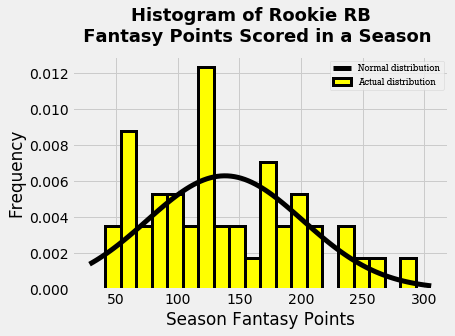

In [22]:
# Histogram graph of rookie RB fantasy points scored in a season

plt.style.use('fivethirtyeight')
rookiefantpthist, ax = plt.subplots()

ax.hist(dfRookieRBPrev['FantPt'], bins = 20, color = 'yellow',edgecolor = 'black', linewidth = 3, normed = True, label = "Actual distribution")
rookiefantpthist.suptitle("Histogram of Rookie RB \n Fantasy Points Scored in a Season", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Season Fantasy Points")
ax.set_ylabel("Frequency")

overall_mean = dfRookieRBPrev['FantPt'].mean()
overall_std = dfRookieRBPrev['FantPt'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='black', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

rookiefantpthist.savefig('rookierb-fantpt-history.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = -0.09189929392924728 , intercept = 4.876595665307905 , r_value = -0.1041690048474905 , p_value = 0.49588466031951905 , std_err = 0.1338043553181008


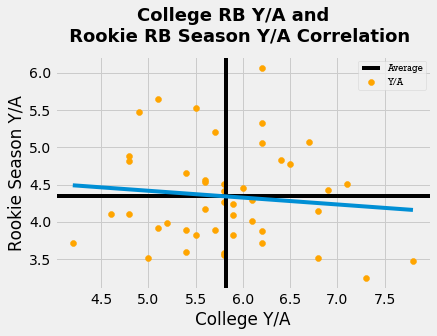

In [23]:
# Scatter plot of correlation between College Y/A and Rookie season Y/A

plt.style.use('fivethirtyeight')
 
rookierbya, ax = plt.subplots()

ax.scatter(dfRookieRBPrev['Y/A-Col'], dfRookieRBPrev['Y/A'], color = 'orange')
ax.axvline(x = np.mean(dfRookieRBPrev['Y/A-Col']), color = 'black')
ax.axhline(y = np.mean(dfRookieRBPrev['Y/A']), label = "Average", color = 'black')
rookierbya.suptitle("College RB Y/A and \n Rookie RB Season Y/A Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College Y/A")
ax.set_ylabel("Rookie Season Y/A")
 
ax.plot(np.unique(dfRookieRBPrev['Y/A-Col']), np.poly1d(np.polyfit(dfRookieRBPrev['Y/A-Col'], dfRookieRBPrev['Y/A'], 1))(np.unique(dfRookieRBPrev['Y/A-Col'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieRBPrev['Y/A-Col'], dfRookieRBPrev['Y/A'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookierbya.savefig('college-nfl-YArb.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = -0.853896103896104 , intercept = 199.04184704184706 , r_value = -0.022586814621656393 , p_value = 0.8829173855453113 , std_err = 5.7637483078471226


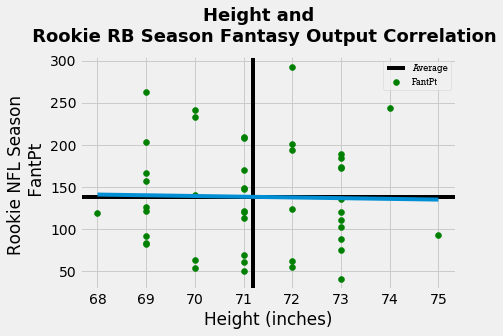

In [24]:
# Scatter plot of correlation between Height and Rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rookierbheight, ax = plt.subplots()

ax.scatter(dfRookieRBPrev['Height'], dfRookieRBPrev['FantPt'], color = 'green')
ax.axvline(x = np.mean(dfRookieRBPrev['Height']), color = 'black')
ax.axhline(y = np.mean(dfRookieRBPrev['FantPt']), label = "Average", color = 'black')
rookierbheight.suptitle("Height and \n Rookie RB Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Height (inches)")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieRBPrev['Height']), np.poly1d(np.polyfit(dfRookieRBPrev['Height'], dfRookieRBPrev['FantPt'], 1))(np.unique(dfRookieRBPrev['Height'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieRBPrev['Height'], dfRookieRBPrev['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookierbheight.savefig('college-nfl-heightrb.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 1.416812609457093 , intercept = -170.62070441720184 , r_value = 0.27948962570462227 , p_value = 0.06297618835853352 , std_err = 0.742251351716035


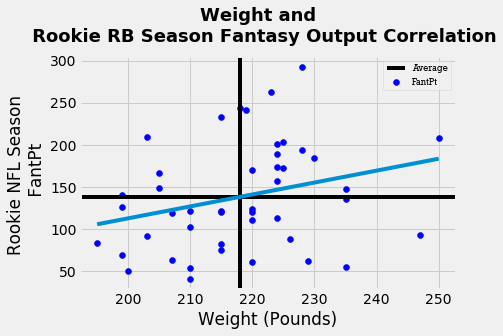

In [25]:
# Scatter plot of correlation between Weight and Rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rookierbweight, ax = plt.subplots()

ax.scatter(dfRookieRBPrev['Weight'], dfRookieRBPrev['FantPt'], color = 'blue')
ax.axvline(x = np.mean(dfRookieRBPrev['Weight']), color = 'black')
ax.axhline(y = np.mean(dfRookieRBPrev['FantPt']), label = "Average", color = 'black')
rookierbweight.suptitle("Weight and \n Rookie RB Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Weight (Pounds)")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieRBPrev['Weight']), np.poly1d(np.polyfit(dfRookieRBPrev['Weight'], dfRookieRBPrev['FantPt'], 1))(np.unique(dfRookieRBPrev['Weight'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieRBPrev['Weight'], dfRookieRBPrev['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookierbweight.savefig('college-nfl-weightrb.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 60.66901510120409 , intercept = -139.0712903877806 , r_value = 0.0895535544289224 , p_value = 0.6318763573655108 , std_err = 125.29582818978653


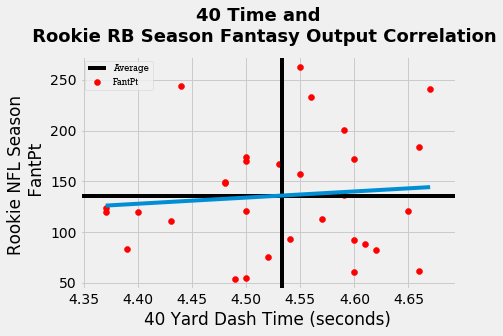

In [26]:
# Scatter plot of correlation between 40 Time and Rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rookierb40, ax = plt.subplots()

ax.scatter(dfRookieRBPrevGraph['40 Time'], dfRookieRBPrevGraph['FantPt'], color = 'red')
ax.axvline(x = np.mean(dfRookieRBPrevGraph['40 Time']), color = 'black')
ax.axhline(y = np.mean(dfRookieRBPrevGraph['FantPt']), label = "Average", color = 'black')
rookierb40.suptitle("40 Time and \n Rookie RB Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("40 Yard Dash Time (seconds)")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieRBPrevGraph['40 Time']), np.poly1d(np.polyfit(dfRookieRBPrevGraph['40 Time'], dfRookieRBPrevGraph['FantPt'], 1))(np.unique(dfRookieRBPrevGraph['40 Time'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieRBPrevGraph['40 Time'], dfRookieRBPrevGraph['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookierb40.savefig('college-nfl-40rb.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = -2.158273381294964 , intercept = 212.55418890693898 , r_value = -0.1256378612681699 , p_value = 0.500659817947362 , std_err = 3.1646955672573123


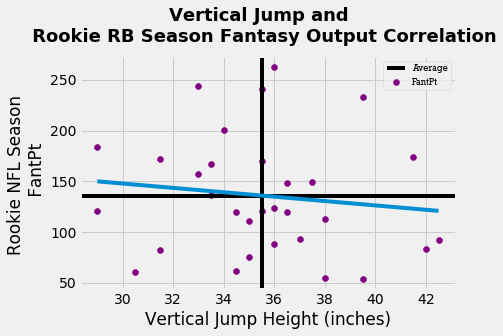

In [27]:
# Scatter plot of correlation between Vertical Jump and Rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rookierbvert, ax = plt.subplots()

ax.scatter(dfRookieRBPrevGraph['Vertical'], dfRookieRBPrevGraph['FantPt'], color = 'purple')
ax.axvline(x = np.mean(dfRookieRBPrevGraph['Vertical']), color = 'black')
ax.axhline(y = np.mean(dfRookieRBPrevGraph['FantPt']), label = "Average", color = 'black')
rookierbvert.suptitle("Vertical Jump and \n Rookie RB Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Vertical Jump Height (inches)")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieRBPrevGraph['Vertical']), np.poly1d(np.polyfit(dfRookieRBPrevGraph['Vertical'], dfRookieRBPrevGraph['FantPt'], 1))(np.unique(dfRookieRBPrevGraph['Vertical'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieRBPrevGraph['Vertical'], dfRookieRBPrevGraph['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookierbvert.savefig('college-nfl-vertrb.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 0.6790227272727272 , intercept = 54.1899090909091 , r_value = 0.07988522777056505 , p_value = 0.6692423906320955 , std_err = 1.5733619231955178


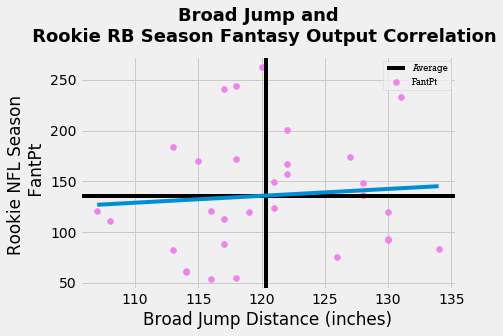

In [28]:
# Scatter plot of correlation between Vertical Jump and Rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rookierbbroad, ax = plt.subplots()

ax.scatter(dfRookieRBPrevGraph['Broad Jump'], dfRookieRBPrevGraph['FantPt'], color = 'violet')
ax.axvline(x = np.mean(dfRookieRBPrevGraph['Broad Jump']), color = 'black')
ax.axhline(y = np.mean(dfRookieRBPrevGraph['FantPt']), label = "Average", color = 'black')
rookierbbroad.suptitle("Broad Jump and \n Rookie RB Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Broad Jump Distance (inches)")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieRBPrevGraph['Broad Jump']), np.poly1d(np.polyfit(dfRookieRBPrevGraph['Broad Jump'], dfRookieRBPrevGraph['FantPt'], 1))(np.unique(dfRookieRBPrevGraph['Broad Jump'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieRBPrevGraph['Broad Jump'], dfRookieRBPrevGraph['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookierbbroad.savefig('college-nfl-broadrb.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = -5.835283535849023 , intercept = 205.08776327733963 , r_value = -0.13509766381393576 , p_value = 0.303396897338763 , std_err = 5.619533666791367


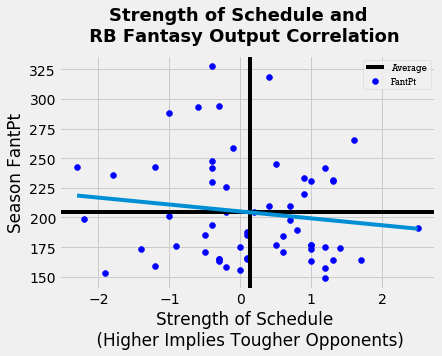

In [29]:
# Scatter plot of correlation between Strength of Schedule and Rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rookierbsos, ax = plt.subplots()

ax.scatter(dfTrainingRB['SOS'], dfTrainingRB['FantPt'], color = 'blue')
ax.axvline(x = np.mean(dfTrainingRB['SOS']), color = 'black')
ax.axhline(y = np.mean(dfTrainingRB['FantPt']), label = "Average", color = 'black')
rookierbsos.suptitle("Strength of Schedule and \n RB Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Strength of Schedule \n (Higher Implies Tougher Opponents)")
ax.set_ylabel("Season FantPt")
 
ax.plot(np.unique(dfTrainingRB['SOS']), np.poly1d(np.polyfit(dfTrainingRB['SOS'], dfTrainingRB['FantPt'], 1))(np.unique(dfTrainingRB['SOS'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfTrainingRB['SOS'], dfTrainingRB['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookierbsos.savefig('sos-fantptrb.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = -1.6560039259584762 , intercept = 225.3588499251053 , r_value = -0.35668248828936616 , p_value = 0.005151843908720288 , std_err = 0.5695310077371333


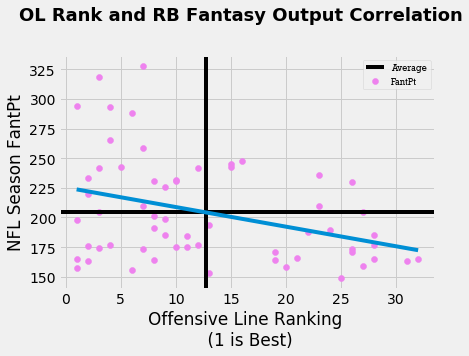

In [30]:
# Scatter plot of correlation between OL Rank (Run Blocking) and Rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rbol, ax = plt.subplots()

ax.scatter(dfTrainingRB['OL RNK'], dfTrainingRB['FantPt'], color = 'violet')
ax.axvline(x = np.mean(dfTrainingRB['OL RNK']), color = 'black')
ax.axhline(y = np.mean(dfTrainingRB['FantPt']), label = "Average", color = 'black')
rbol.suptitle("OL Rank and RB Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Offensive Line Ranking \n (1 is Best)")
ax.set_ylabel("NFL Season FantPt")
 
ax.plot(np.unique(dfTrainingRB['OL RNK']), np.poly1d(np.polyfit(dfTrainingRB['OL RNK'], dfTrainingRB['FantPt'], 1))(np.unique(dfTrainingRB['OL RNK'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfTrainingRB['OL RNK'], dfTrainingRB['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rbol.savefig('olrnk-fantptrb.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 4.521343732955126 , intercept = 96.69955472855628 , r_value = 0.407462470995274 , p_value = 0.0012324554754979257 , std_err = 1.3305838771845457


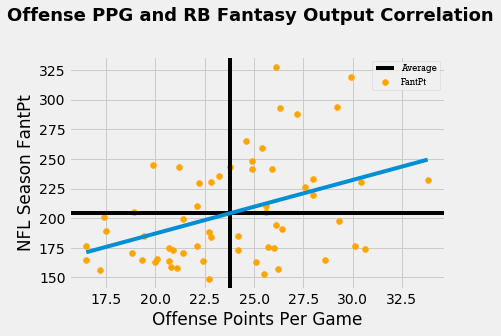

In [31]:
# Scatter plot of correlation between Offense Points Per Game and Rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rboppg, ax = plt.subplots()

ax.scatter(dfTrainingRB['OPPG'], dfTrainingRB['FantPt'], color = 'orange')
ax.axvline(x = np.mean(dfTrainingRB['OPPG']), color = 'black')
ax.axhline(y = np.mean(dfTrainingRB['FantPt']), label = "Average", color = 'black')
rboppg.suptitle("Offense PPG and RB Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Offense Points Per Game")
ax.set_ylabel("NFL Season FantPt")
 
ax.plot(np.unique(dfTrainingRB['OPPG']), np.poly1d(np.polyfit(dfTrainingRB['OPPG'], dfTrainingRB['FantPt'], 1))(np.unique(dfTrainingRB['OPPG'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfTrainingRB['OPPG'], dfTrainingRB['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rboppg.savefig('OPPG-fantptrb.png', dpi = 400, bbox_inches = 'tight')

In [32]:
# Linear Regression predictions 
# Rookies

rookieRB = dfRookieRB2018.loc[:, 'GP': 'Projected GP']
linear_predsR = linReg2.predict(rookieRB)

veteranRB = dfRB2018.loc[:, 'Expected G': 'OL RNK']
linear_predsV = linReg.predict(veteranRB)

linear_preds = []
rows = 0
cols = 0

namesR = dfRookieRB2018.iloc[:, 0]
print("2018 NFL season fantasy points prediction for rookie RBs using Linear Regression: ")
for i in(namesR):
    linear_preds.append([i, linear_predsR[rows][cols]])
    print(i, linear_predsR[rows][cols])  
    rows+=1
    
print()

# Veterans
rows = 0
cols = 0
namesV = dfRB2018.iloc[:, 0]
print("2018 NFL season fantasy points prediction for veteran RBs using Linear Regression: ")
for i in(namesV):
    linear_preds.append([i, linear_predsV[rows][cols]])
    print(i, linear_predsV[rows][cols])  
    rows+=1
    
names = namesR.append(namesV)

2018 NFL season fantasy points prediction for rookie RBs using Linear Regression: 
Saquon Barkley 138.59135013552185
Rashaad Penny 147.2314865228451
Sony Michel 75.72085888226707
Nick Chubb 103.75975804813243
Ronald Jones II -11.210239706287098
Kerryon Johnson 74.55981556860206
Royce Freeman 212.4849851073277

2018 NFL season fantasy points prediction for veteran RBs using Linear Regression: 
Todd Gurley 271.6740578291348
Le'Veon Bell 272.6752698459406
David Johnson 234.04607667386628
Ezekiel Elliott 294.5466546399848
Alvin Kamara 325.2738212162775
Leonard Fournette 233.87889441785256
Kareem Hunt 243.49910023554222
Melvin Gordon 231.2092007371277
Dalvin Cook 222.08668170318455
Christian McCaffrey 268.0015980349037
Devonta Freeman 185.65273103897
Jordan Howard 171.97888027259896
Joe Mixon 134.02461558774723
LeSean McCoy 218.2619178252717
Alex Collins 117.19819242013513
Kenyan Drake 97.22436915647468
Derrick Henry 114.30271712065347
Jay Ajayi 139.52315362579566
Lamar Miller 150.458368100

In [33]:
# Ridge Regression predictions 
# Rookies

rows = 0
cols = 0
ridge_preds = []
ridge_predsR = ridgeReg2.predict(rookieRB)
print("2018 NFL season fantasy points prediction for rookie RBs using Ridge Regression: ")
for i in(namesR):
    ridge_preds.append([i, ridge_predsR[rows][cols]])
    print(i, ridge_predsR[rows][cols])  
    rows+=1
    
print()

# Veterans
rows = 0
cols = 0
ridge_predsV = ridgeReg.predict(veteranRB)
print("2018 NFL season fantasy points prediction for veteran RBs using Ridge Regression: ")
for i in(namesV):
    ridge_preds.append([i, ridge_predsV[rows][cols]])
    print(i, ridge_predsV[rows][cols])  
    rows+=1

2018 NFL season fantasy points prediction for rookie RBs using Ridge Regression: 
Saquon Barkley 143.93654179047667
Rashaad Penny 135.62079292673883
Sony Michel 105.94984671155777
Nick Chubb 91.61391505714084
Ronald Jones II 45.751671058829814
Kerryon Johnson 109.87626130855617
Royce Freeman 189.57858864601775

2018 NFL season fantasy points prediction for veteran RBs using Ridge Regression: 
Todd Gurley 273.36815786483146
Le'Veon Bell 274.0373881575865
David Johnson 228.9973892134209
Ezekiel Elliott 288.0831445631121
Alvin Kamara 318.1572551264718
Leonard Fournette 230.07978597040474
Kareem Hunt 246.0387171275439
Melvin Gordon 233.0065676249212
Dalvin Cook 226.80016569794842
Christian McCaffrey 260.76274778879326
Devonta Freeman 182.91632796665337
Jordan Howard 178.80218568325333
Joe Mixon 147.1416668856709
LeSean McCoy 209.6246267323978
Alex Collins 123.60582429523052
Kenyan Drake 98.3037716361161
Derrick Henry 113.81314142303569
Jay Ajayi 144.31781140090908
Lamar Miller 153.74874627

In [34]:
# Bayesian Ridge Regression predictions 
# Rookies

rows = 0
cols = 0
bayes_preds = []
bayes_predsR = bayesianRidge2.predict(rookieRB)
print("2018 NFL season fantasy points prediction for rookie RBs using Bayesian Ridge Regression: ")
for i in(namesR):
    bayes_preds.append([i, bayes_predsR[rows]])
    print(i, bayes_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
cols = 0
bayes_predsV = bayesianRidge.predict(veteranRB)
print("2018 NFL season fantasy points prediction for veteran RBs using Bayesian Ridge Regression: ")
for i in(namesV):
    bayes_preds.append([i, bayes_predsV[rows]])
    print(i, bayes_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie RBs using Bayesian Ridge Regression: 
Saquon Barkley 130.9232704190305
Rashaad Penny 130.57148860223217
Sony Michel 130.6760048849937
Nick Chubb 130.11594442492625
Ronald Jones II 130.49197683546961
Kerryon Johnson 130.98924350008903
Royce Freeman 130.07613374440547

2018 NFL season fantasy points prediction for veteran RBs using Bayesian Ridge Regression: 
Todd Gurley 272.08294318473963
Le'Veon Bell 272.9280373885083
David Johnson 233.36821581296192
Ezekiel Elliott 294.31071950570845
Alvin Kamara 324.38277143070593
Leonard Fournette 234.67827919784386
Kareem Hunt 243.43620162439626
Melvin Gordon 231.69919837195658
Dalvin Cook 222.3257508429382
Christian McCaffrey 266.6858113077968
Devonta Freeman 184.87240060972715
Jordan Howard 172.46839438381394
Joe Mixon 134.37788653695458
LeSean McCoy 217.44010963492505
Alex Collins 116.9415452860887
Kenyan Drake 97.04906691886993
Derrick Henry 113.52659206185803
Jay Ajayi 139.69653768909853
Lam

In [35]:
# Support Vector Regression predictions 
# Rookies

rows = 0
svr_preds = []
svr_predsR = svr_rbf2.predict(rookieRB)
print("2018 NFL season fantasy points prediction for rookie RBs using Support Vector Regression: ")
for i in(namesR):
    svr_preds.append([i, svr_predsR[rows]])
    print(i, svr_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
svr_predsV = svr_rbf.predict(veteranRB)
print("2018 NFL season fantasy points prediction for veteran RBs using Support Vector Regression: ")
for i in(namesV):
    svr_preds.append([i, svr_predsV[rows]])
    print(i, svr_predsV[rows])  
    rows+=1

# Not very accurate for RB, will not include in MSE/RMSE test for accuracy

2018 NFL season fantasy points prediction for rookie RBs using Support Vector Regression: 
Saquon Barkley 130.77050812422354
Rashaad Penny 130.77050812365172
Sony Michel 130.77050812365172
Nick Chubb 130.7705081236517
Ronald Jones II 130.770508071918
Kerryon Johnson 130.77050812365172
Royce Freeman 130.77050812365172

2018 NFL season fantasy points prediction for veteran RBs using Support Vector Regression: 
Todd Gurley 211.0156582809108
Le'Veon Bell 210.99532972442168
David Johnson 210.98645117549515
Ezekiel Elliott 210.9893671076147
Alvin Kamara 210.98645113789027
Leonard Fournette 215.18187271733944
Kareem Hunt 236.9500455664958
Melvin Gordon 210.56012541653666
Dalvin Cook 210.98532185366398
Christian McCaffrey 210.9864511378903
Devonta Freeman 210.5564436682713
Jordan Howard 207.42839516729245
Joe Mixon 194.24627660430266
LeSean McCoy 211.87103049097166
Alex Collins 210.98645113781495
Kenyan Drake 210.98645113789027
Derrick Henry 210.98645113789007
Jay Ajayi 185.47354121512979
Lama

In [36]:
# Random Forest Regression predictions 
# Rookies

rows = 0
rf_preds = []
rf_predsR = randomForest2.predict(rookieRB)
print("2018 NFL season fantasy points prediction for rookie RBs using Random Forest Regression: ")
for i in(namesR):
    rf_preds.append([i, rf_predsR[rows]])
    print(i, rf_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
rf_predsV = randomForest.predict(veteranRB)
print("2018 NFL season fantasy points prediction for veteran RBs using Random Forest Regression: ")
for i in(namesV):
    rf_preds.append([i, rf_predsV[rows]])
    print(i, rf_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie RBs using Random Forest Regression: 
Saquon Barkley 190.01
Rashaad Penny 158.61
Sony Michel 91.89
Nick Chubb 145.2
Ronald Jones II 102.95
Kerryon Johnson 125.62
Royce Freeman 198.9

2018 NFL season fantasy points prediction for veteran RBs using Random Forest Regression: 
Todd Gurley 270.86
Le'Veon Bell 261.04
David Johnson 243.93
Ezekiel Elliott 257.63
Alvin Kamara 252.92
Leonard Fournette 222.85
Kareem Hunt 246.38
Melvin Gordon 246.98
Dalvin Cook 232.98
Christian McCaffrey 237.26
Devonta Freeman 193.62
Jordan Howard 180.55
Joe Mixon 176.57
LeSean McCoy 205.99
Alex Collins 163.35
Kenyan Drake 175.18
Derrick Henry 167.6
Jay Ajayi 167.48
Lamar Miller 169.18
Mark Ingram 174.47
Marshawn Lynch 177.48
Carlos Hyde 165.33
Dion Lewis 164.87
Rex Burkhead 164.5
Tevin Coleman 173.72
Isaiah Crowell 164.96
Chris Carson 170.95
Tarik Cohen 231.1
Marlon Mack 168.58
Chris Thompson 213.58
Peyton Barber 163.07
Jamaal Williams 163.51
James White 229.68


In [37]:
# Gradient Boosting Regression predictions 
# Rookies

rows = 0
gb_preds = []
gb_predsR = gradBoost2.predict(rookieRB)
print("2018 NFL season fantasy points prediction for rookie RBs using Gradient Boosting Regression: ")
for i in(namesR):
    gb_preds.append([i, gb_predsR[rows]])
    print(i, gb_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
gb_predsV = gradBoost.predict(veteranRB)
print("2018 NFL season fantasy points prediction for veteran RBs using Gradient Boosting Regression: ")
for i in(namesV):
    gb_preds.append([i, gb_predsV[rows]])
    print(i, gb_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie RBs using Gradient Boosting Regression: 
Saquon Barkley 180.06323453103118
Rashaad Penny 195.88902611440457
Sony Michel 82.41051075582546
Nick Chubb 104.10024936943925
Ronald Jones II 95.7962711878022
Kerryon Johnson 128.16977994179376
Royce Freeman 246.61401374226577

2018 NFL season fantasy points prediction for veteran RBs using Gradient Boosting Regression: 
Todd Gurley 286.38063923772006
Le'Veon Bell 284.2910670709288
David Johnson 243.4724411074369
Ezekiel Elliott 257.4065950911552
Alvin Kamara 260.2745708534426
Leonard Fournette 243.51287266363735
Kareem Hunt 267.6072269928587
Melvin Gordon 242.4869604611994
Dalvin Cook 234.1797065912936
Christian McCaffrey 238.59210919807862
Devonta Freeman 179.28001487668675
Jordan Howard 176.97915863281014
Joe Mixon 170.4589007720711
LeSean McCoy 194.05832507329063
Alex Collins 147.70441641562743
Kenyan Drake 167.70400627747344
Derrick Henry 152.8968598753635
Jay Ajayi 159.74801228032072
La

In [38]:
# Convert predictions to dataframes 

dflinear = pd.DataFrame(linear_preds, columns = ['Name', 'FantPtLinear'])
dfridge = pd.DataFrame(ridge_preds, columns = ['Name', 'FantPtRidge'])
dfbayes = pd.DataFrame(bayes_preds, columns = ['Name', 'FantPtBayes'])
dfrand = pd.DataFrame(rf_preds, columns = ['Name', 'FantPtRF'])
dfgrad = pd.DataFrame(gb_preds, columns = ['Name', 'FantPtGB'])

In [39]:
# Merge with expected data/ ESPN Projections for validation

dflinear = dflinear.merge(dfProjectedRB)
dfridge = dfridge.merge(dfProjectedRB)
dfbayes = dfbayes.merge(dfProjectedRB)
dfrand = dfrand.merge(dfProjectedRB)
dfgrad = dfgrad.merge(dfProjectedRB)
dflinear.head()

,Name,FantPtLinear,Projected,ESPN
0,Saquon Barkley,138.591350,314.2,220.9
1,Rashaad Penny,147.231487,76.0,116.3
2,Sony Michel,75.720859,131.9,90.1
3,Nick Chubb,103.759758,185.8,50.3
4,Ronald Jones II,-11.210240,22.1,99.2


In [40]:
# RMSE and MSE validation for ESPN's Predictions

mse = 0
for row in dflinear.itertuples():
    temp = row.Projected-row.ESPN
    temp = temp * temp
    mse += temp
mse = mse/dflinear.shape[0]
rmse = math.sqrt(mse)

print("ESPN Mean Squared Error: " + str(mse))
print("ESPN Root Mean Squared Error: " + str(rmse))

ESPN Mean Squared Error: 6802.264782608697
ESPN Root Mean Squared Error: 82.47584363077893


In [41]:
# RMSE and MSE validation for Linear Regression predictions

mselinear = 0
for row in dflinear.itertuples():
    temp = row.Projected-row.FantPtLinear
    temp = temp * temp
    mselinear += temp
mselinear = mselinear/dflinear.shape[0]
rmselinear = math.sqrt(mselinear)

print("Linear Regression Mean Squared Error: " + str(mselinear))
print("Linear Regression Root Mean Squared Error: " + str(rmselinear))

Linear Regression Mean Squared Error: 6705.507500772354
Linear Regression Root Mean Squared Error: 81.88716322337925


In [42]:
# RMSE and MSE validation for Ridge Regression predictions

mseridge = 0
for row in dfridge.itertuples():
    temp = row.Projected-row.FantPtRidge
    temp = temp * temp
    mseridge += temp
mseridge = mseridge/dfridge.shape[0]
rmseridge = math.sqrt(mseridge)

print("Ridge Regression Mean Squared Error: " + str(mseridge))
print("Ridge Regression Root Mean Squared Error: " + str(rmseridge))

Ridge Regression Mean Squared Error: 6341.138645685908
Ridge Regression Root Mean Squared Error: 79.63126675926931


In [43]:
# RMSE and MSE validation for Bayesian Ridge Regression predictions

msebayes = 0
for row in dfbayes.itertuples():
    temp = row.Projected-row.FantPtBayes
    temp = temp * temp
    msebayes += temp
msebayes = msebayes/dfbayes.shape[0]
rmsebayes = math.sqrt(msebayes)

print("Bayesian Ridge Regression Mean Squared Error: " + str(msebayes))
print("Bayesian Ridge Regression Root Mean Squared Error: " + str(rmsebayes))

Bayesian Ridge Regression Mean Squared Error: 6439.625513187765
Bayesian Ridge Regression Root Mean Squared Error: 80.24727729454604


In [44]:
# RMSE and MSE validation for Random Forest Regression predictions

mserf = 0
for row in dfrand.itertuples():
    temp = row.Projected-row.FantPtRF
    temp = temp * temp
    mserf += temp
mserf = mserf/dfrand.shape[0]
rmserf = math.sqrt(mserf)

print("Random Forest Regression Mean Squared Error: " + str(mserf))
print("Random Forest Regression Root Mean Squared Error: " + str(rmserf))

Random Forest Regression Mean Squared Error: 7532.873878260871
Random Forest Regression Root Mean Squared Error: 86.79213027838912


In [45]:
# RMSE and MSE validation for Gradient Boosting Regression predictions

msegb = 0
for row in dfgrad.itertuples():
    temp = row.Projected-row.FantPtGB
    temp = temp * temp
    msegb += temp
msegb = msegb/dfgrad.shape[0]
rmsegb = math.sqrt(msegb)

print("Gradient Boosting Regression Mean Squared Error: " + str(msegb))
print("Gradient Boosting Regression Root Mean Squared Error: " + str(rmsegb))

Gradient Boosting Regression Mean Squared Error: 7782.605181016307
Gradient Boosting Regression Root Mean Squared Error: 88.2190749272305


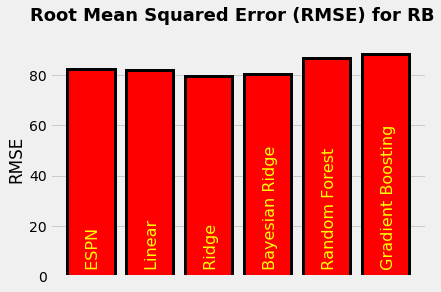

In [46]:
# Root Mean Squared Error Graph

rmsePlot, ax = plt.subplots()

rmseScores = [rmse, rmselinear, rmseridge, rmsebayes, rmserf, rmsegb]
x_pos = np.arange(len(rmseScores))

ax.bar(x_pos, rmseScores, edgecolor = 'black', color = 'red', linewidth = 3)

rmseNames = [" ESPN", " Linear", " Ridge", " Bayesian Ridge", " Random Forest", " Gradient Boosting"]

labels = [i for i in rmseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'yellow', size = 16)

rmsePlot.suptitle("Root Mean Squared Error (RMSE) for RB", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("RMSE")

rmsePlot.savefig('rmseRB-plot.png', dpi = 400, bbox_inches = 'tight')

[['Alvin Kamara', 318.1572551264718], ['Ezekiel Elliott', 288.0831445631121], ["Le'Veon Bell", 274.0373881575865], ['Todd Gurley', 273.36815786483146], ['Christian McCaffrey', 260.76274778879326], ['Kareem Hunt', 246.0387171275439], ['Melvin Gordon', 233.0065676249212], ['Leonard Fournette', 230.07978597040474], ['David Johnson', 228.9973892134209], ['Dalvin Cook', 226.80016569794842]]


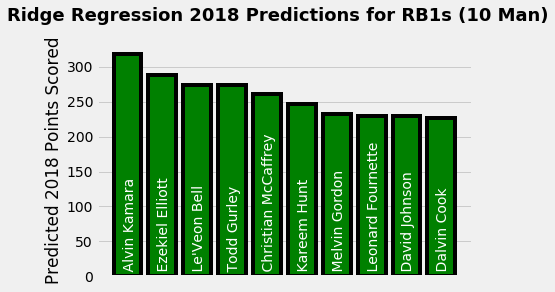

In [47]:
# Predictions for RB1s (RB #1 - RB #10) for using most accurate ML technique (Ridge Regression) by RMSE

plt.style.use('fivethirtyeight')
ridgepredictions, ax = plt.subplots()
ridgePlot = []

for i in range(len(ridge_preds)):
    ridgePlot.append(ridge_preds[i][1])
    
combinedRidge = [[i, j] for i, j in zip(names, ridgePlot)]
sortedRidge = sorted(combinedRidge, key = itemgetter(1), reverse = True)

RB1Ridge = []
RB1Ridge = sortedRidge[0:10]
print(RB1Ridge)

sortedRidgeData = [row[1] for row in RB1Ridge]
x_pos = np.arange(len(sortedRidgeData))

ax.bar(x_pos, sortedRidgeData, color = 'green' ,edgecolor = 'black', linewidth = 4)
labels = [' '+ row[0] for row in sortedRidge]
rects = ax.patches
test = 0
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white')
    test += 1

ridgepredictions.suptitle("Ridge Regression 2018 Predictions for RB1s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Points Scored")

ridgepredictions.savefig('ridgepredictionsRB1.png', dpi = 400, bbox_inches = 'tight')

[['LeSean McCoy', 209.6246267323978], ['Adrian Peterson', 199.4593881514368], ['Marshawn Lynch', 191.06127609162064], ['Royce Freeman', 189.57858864601775], ['Devonta Freeman', 182.91632796665337], ['Jordan Howard', 178.80218568325333], ['Mark Ingram', 173.83841683696195], ['Chris Carson', 165.47899308921512], ['Lamar Miller', 153.74874627000884], ['Aaron Jones', 153.0422409053635]]


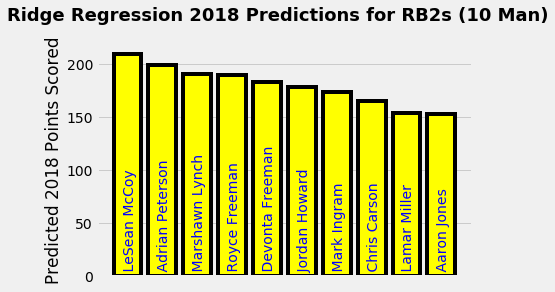

In [48]:
# Predictions for RB2s (RB #11 - RB #20) for using most accurate ML technique (Ridge Regression) by RMSE

plt.style.use('fivethirtyeight')
ridgepredictions, ax = plt.subplots()

RB2Ridge = []
RB2Ridge = sortedRidge[10:20]
print(RB2Ridge)

sortedRidgeData = [row[1] for row in RB2Ridge]
x_pos = np.arange(len(sortedRidgeData))

ax.bar(x_pos, sortedRidgeData, color = 'yellow' ,edgecolor = 'black', linewidth = 4)

labelsRB2 = labels[10:20]
rects = ax.patches
test = 0
for rect, label in zip(rects, labelsRB2):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'blue')
    test += 1

ridgepredictions.suptitle("Ridge Regression 2018 Predictions for RB2s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Points Scored")

ridgepredictions.savefig('ridgepredictionsRB2.png', dpi = 400, bbox_inches = 'tight')

[['Carlos Hyde', 147.80714170522648], ['Joe Mixon', 147.1416668856709], ['Jay Ajayi', 144.31781140090908], ['Saquon Barkley', 143.93654179047667], ['Tevin Coleman', 142.18693522925852], ['Isaiah Crowell', 136.90096396802988], ['Marlon Mack', 136.73856173159007], ['Rashaad Penny', 135.62079292673883], ['Tarik Cohen', 134.07728660289686]]


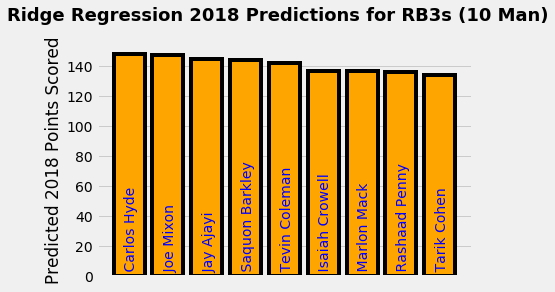

In [49]:
# Predictions for RB3s (RB #21 - RB #30) for using most accurate ML technique (Ridge Regression) by RMSE

plt.style.use('fivethirtyeight')
ridgepredictions, ax = plt.subplots()

RB3Ridge = []
RB3Ridge = sortedRidge[21:30]
print(RB3Ridge)

sortedRidgeData = [row[1] for row in RB3Ridge]
x_pos = np.arange(len(sortedRidgeData))

ax.bar(x_pos, sortedRidgeData, color = 'orange' ,edgecolor = 'black', linewidth = 4)

labelsRB3 = labels[21:30]
rects = ax.patches
test = 0
for rect, label in zip(rects, labelsRB3):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'blue')
    test += 1

ridgepredictions.suptitle("Ridge Regression 2018 Predictions for RB3s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Points Scored")

ridgepredictions.savefig('ridgepredictionsRB3.png', dpi = 400, bbox_inches = 'tight')

Average 2018 Season Projections for RB1s:
[['Alvin Kamara', 296.20168372537955], ['Ezekiel Elliott', 278.39542275999213], ['Todd Gurley', 274.87315962328523], ["Le'Veon Bell", 272.99435249259284], ['Christian McCaffrey', 254.26045326591446], ['Kareem Hunt', 249.39224919606824], ['Melvin Gordon', 237.076385439041], ['David Johnson', 236.76282456153723], ['Leonard Fournette', 232.99996644994772], ['Dalvin Cook', 227.67446096707295]]


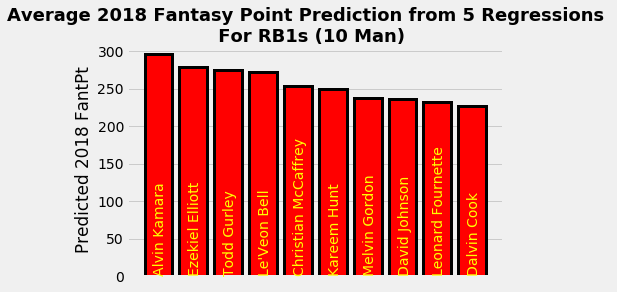

In [50]:
# Average Predictions plot for RB1 (RB#1 - RB#10) 

avgPredictions, ax = plt.subplots()

averagePred = []
name = 0

for h, i ,j ,k , l, in zip(linear_preds, ridge_preds, bayes_preds, rf_preds, gb_preds):
    averagePred.append([linear_preds[name][0], (linear_preds[name][1] + ridge_preds[name][1] + bayes_preds[name][1] + rf_preds[name][1] + gb_preds[name][1]) / 5])
    name += 1

sortedAvg = sorted(averagePred, key = itemgetter(1), reverse = True)
RB1Avg = []
RB1Avg = sortedAvg[0:10]
print("Average 2018 Season Projections for RB1s:")
print(RB1Avg)

sortedAvgData = [row[1] for row in RB1Avg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, color = 'Red', edgecolor = 'black', linewidth = 3)

labels = [row[0] for row in sortedAvg]
labelsRB1 = labels[0:10]

rects = ax.patches
for rect, label in zip(rects, labelsRB1):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'Yellow')

avgPredictions.suptitle("Average 2018 Fantasy Point Prediction from 5 Regressions \n For RB1s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 FantPt")

avgPredictions.savefig('avg-predictionsRB1.png', dpi = 400, bbox_inches = 'tight')

Average 2018 Season Projections for RB2s:
[['Royce Freeman', 195.53074424800334], ['Adrian Peterson', 192.45417998237133], ['Marshawn Lynch', 185.9043454992779], ['Devonta Freeman', 185.26829489840745], ['Jordan Howard', 176.15572379449526], ['Mark Ingram', 170.3472625963471], ['Tarik Cohen', 167.7256231659913], ['James White', 164.89256189574365], ['Aaron Jones', 163.902424774757]]


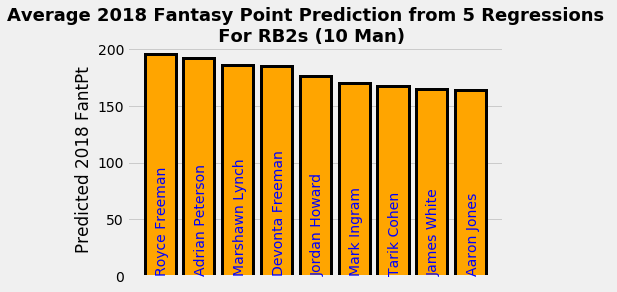

In [51]:
# Average Predictions plot for RB2 (RB#11 - RB#20) 

avgPredictions, ax = plt.subplots()

RB2Avg = []
RB2Avg = sortedAvg[11:20]
print("Average 2018 Season Projections for RB2s:")
print(RB2Avg)

sortedAvgData = [row[1] for row in RB2Avg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, color = 'orange', edgecolor = 'black', linewidth = 3)

labels = [row[0] for row in sortedAvg]
labelsRB2 = labels[11:20]

rects = ax.patches
for rect, label in zip(rects, labelsRB2):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'blue')

avgPredictions.suptitle("Average 2018 Fantasy Point Prediction from 5 Regressions \n For RB2s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 FantPt")

avgPredictions.savefig('avg-predictionsRB2.png', dpi = 400, bbox_inches = 'tight')

Average 2018 Season Projections for RB3s:
[['Lamar Miller', 157.13831264895475], ['Saquon Barkley', 156.70487937521204], ['Carlos Hyde', 154.8065598991231], ['Rashaad Penny', 153.58455883324413], ['James Conner', 153.34468473585156], ['Joe Mixon', 152.51461395648874], ['Duke Johnson', 152.47824283135301], ['Tevin Coleman', 151.4947846349125], ['Jay Ajayi', 150.1531029992248]]


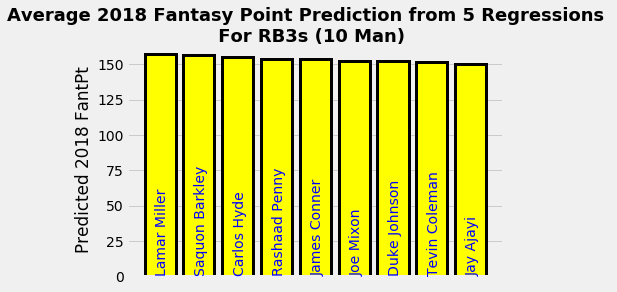

In [52]:
# Average Predictions plot for RB3 (RB#11 - RB#20) 

avgPredictions, ax = plt.subplots()

RB3Avg = []
RB3Avg = sortedAvg[21:30]
print("Average 2018 Season Projections for RB3s:")
print(RB3Avg)

sortedAvgData = [row[1] for row in RB3Avg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, color = 'yellow', edgecolor = 'black', linewidth = 3)

labels = [row[0] for row in sortedAvg]
labelsRB3 = labels[21:30]

rects = ax.patches
for rect, label in zip(rects, labelsRB3):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'blue')

avgPredictions.suptitle("Average 2018 Fantasy Point Prediction from 5 Regressions \n For RB3s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 FantPt")

avgPredictions.savefig('avg-predictionsRB3.png', dpi = 400, bbox_inches = 'tight')